In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
import matplotlib.pyplot as plt

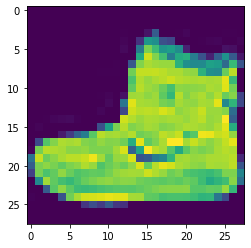

In [3]:
plt.imshow(x_train[0])

In [4]:
y_train[0]

9

In [5]:
x_train.max()

255

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
x_train.max()

1.0

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
# int8 format
x_test=x_test.reshape(10000, 28, 28,1)
x_test.shape

(10000, 28, 28, 1)

In [11]:
x_train=x_train.reshape(60000, 28, 28,1)
x_train.shape

(60000, 28, 28, 1)

you convert the categorical data into a vector of numbers. The reason why you convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. 
You generate one boolean column for each category or class.
Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding
[0 0 0 0 0 0 0 0 1 0]

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
#convert the class labels into a one-hot encoding vector.
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))
#Compile the Model
model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [18]:
model.fit(x_train,y_cat_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.3933 - accuracy: 0.8607
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2730 - accuracy: 0.9016
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2346 - accuracy: 0.9156
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2122 - accuracy: 0.9229
Epoch 5/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1947 - accuracy: 0.9300
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1812 - accuracy: 0.9348
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1679 - accuracy: 0.9400
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1573 - accuracy: 0.9439
Epoch 9/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1487 - accuracy: 0.9476
Epoch 10/10
1875/1875 [==============================] - 34s 18m

In [19]:
model.metrics_names

['loss', 'accuracy']

In [20]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3410 - accuracy: 0.9046


[0.3409821391105652, 0.9046000242233276]

In [21]:
from sklearn.metrics import classification_report

In [25]:
#predictions = model.predict_classes(x_test)

In [24]:
#print(classification_report(y_test,predictions))